<a href="https://colab.research.google.com/github/tushara19/Sentiment-Analysis/blob/main/katy_perry_yt_comments_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [ ]:
 !python -m pip install -U pycld2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41.4 MB 1.4 MB/s 
  Created wheel for pycld2: filename=pycld2-0.41-cp37-cp37m-linux_x86_64.whl size=9834245 sha256=f99bf1a00c17f08778c9aa8e2227b6705c4b13b119dd288dbfbf73ef51ca4ef2
  Stored in directory: /root/.cache/pip/wheels/ed/e4/58/ed2e9f43c07d617cc81fe7aff0fc6e42b16c9cf6afe960b614
Successfully built pycld2


In [ ]:
import pycld2 as cld2

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/iiit-h srishti/datasets/Youtube02-KatyPerry.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  350 non-null    object
 1   AUTHOR      350 non-null    object
 2   DATE        350 non-null    object
 3   CONTENT     350 non-null    object
 4   CLASS       350 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


In [ ]:
df['CONTENT']

0      i love this so much. AND also I Generate Free ...
1      http://www.billboard.com/articles/columns/pop-...
2      Hey guys! Please join me in my fight to help a...
3      http://psnboss.com/?ref=2tGgp3pV6L this is the...
4      Hey everyone. Watch this trailer!!!!!!!!  http...
                             ...                        
345    This song means so much to me thank you  soooo...
346                                               &lt;3﻿
347    KATY PERRY, I AM THE "DÉCIO CABELO", "DECIO HA...
348    Honestly speaking except taylor swift and adel...
349    who is going to reach the billion first : katy...
Name: CONTENT, Length: 350, dtype: object

In [ ]:
comments = df['CONTENT']
st = set()
for com in comments:
   isReliable, textBytesFound, details = cld2.detect(com)
   st.add(details[0][0])
print(st)
print(len(st))

{'Unknown', 'PORTUGUESE', 'ENGLISH'}
3


In [ ]:
for index, row in df.iterrows():
    com = row['CONTENT']
    isReliable, textBytesFound, details = cld2.detect(com)
    if details[0][0] != 'ENGLISH':
        df.drop(index, inplace=True)

len(df)

308

In [ ]:
df.columns


Index(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'CLASS'], dtype='object')

In [ ]:
df['row_id'] = df.index + 1

In [ ]:
df.columns

Index(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'CLASS', 'row_id'], dtype='object')

In [ ]:
df_subset = df[['row_id', 'CONTENT']].copy()
df_subset['CONTENT'] = df_subset['CONTENT'].str.replace("[^a-zA-Z#]", " ")
df_subset['CONTENT'] = df_subset['CONTENT'].str.casefold()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
df1=pd.DataFrame()
df1['row_id']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0

In [ ]:
sid = SentimentIntensityAnalyzer()
t_df = df1
for index, row in df_subset.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        df1['row_id']=row[0]
        df1['sentiment_type']=key
        df1['sentiment_score']=value
        t_df=t_df.append(df1)


#remove dummy row with row_id = 99999999999
t_df_cleaned = t_df[t_df.row_id != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()
# only keep rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']

print(t_df_cleaned.head(10))

   row_id sentiment_type  sentiment_score
0       1       compound           0.8176
0       2       compound           0.8658
0       3       compound           0.7783
0       4       compound           0.0000
0       5       compound           0.0000
0       6       compound           0.6597
0       7       compound           0.0000
0       8       compound           0.2500
0      10       compound           0.0000
0      11       compound           0.9231


In [ ]:
df_output = pd.merge(df, t_df_cleaned, on='row_id', how='inner')
print(df_output.head(10))

                              COMMENT_ID            AUTHOR  \
0      z12pgdhovmrktzm3i23es5d5junftft3f       lekanaVEVO1   
1    z13yx345uxepetggz04ci5rjcxeohzlrtf4          Pyunghee   
2  z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k        Erica Ross   
3    z13jcjuovxbwfr0ge04cev2ipsjdfdurwck      Aviel Haimov   
4  z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k        John Bello   
5  z12rw1o4zvidhdthz04cixxjssq5wzsrlpk0k  Nere Overstylish   
6    z13xizvwrki2hf2ev22txvrp2ovcyf3zq04           Jayki L   
7    z12ogvgbmre3eloah04ccjbpsmusxdxbwc0            djh3mi   
8    z12is34ysrzoy3uwl04cctlxmrekjfuhvig      Mike Bennett   
9    z13ijjrgqqyqzfo2t23zfztbtlu4ghg5o04         Lil Misme   

                  DATE                                            CONTENT  \
0  2014-07-22T15:27:50  i love this so much. AND also I Generate Free ...   
1  2014-07-27T01:57:16  http://www.billboard.com/articles/columns/pop-...   
2  2014-07-27T02:51:43  Hey guys! Please join me in my fight to help a...   
3  2014-0

In [ ]:
df_output[["sentiment_score"]].describe()

,sentiment_score
count,308.000000
mean,0.327406
std,0.468299
min,-0.884700
25%,0.000000
50%,0.420800
75%,0.709600
max,0.988800


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

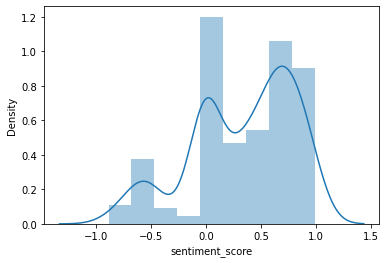

In [ ]:
import seaborn as sn

sn.distplot(df_output['sentiment_score'])
plt.plot()

In [ ]:

def pltvals(lst):

    vals = [0, 0, 0]
    for l in lst:
        if l < -0.5:
           
            vals[0] += 1
        elif l >= -0.5 and l <= 0.5 :
      
            vals[1] += 1
        else:
            vals[2] += 1
    return vals

vals = pltvals(df_output[ 'sentiment_score'])

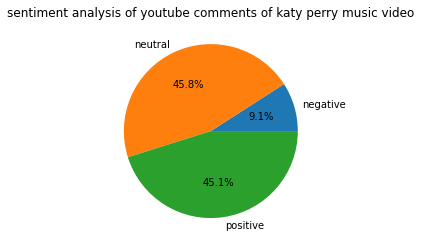

In [ ]:
sentiment_labels = ["negative", "neutral", "positive"]
plt.title("sentiment analysis of youtube comments of katy perry music video")
plt.pie(vals, labels = sentiment_labels, autopct='%1.1f%%' )
plt.show()